# **Project Name**    -  Project Hotel 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 - Shubham Khandelwal**

# **Project Summary -**

This Exploratory Data Analysis (EDA) project delves into a comprehensive hotel booking dataset with the overarching objective of extracting actionable insights to bolster strategic decision-making, optimize revenue streams, and enhance overall operational efficiency within the hospitality sector. Through a rigorous analytical process, various facets of booking behavior, pricing trends, and cancellation patterns were meticulously examined, providing a robust foundation for future business strategies.

The initial phase of the analysis involved scrutinizing the total bookings distributed across different market segments and top contributing countries, visualized effectively through a heatmap. This revealed a striking dominance of "Online TA" (Online Travel Agencies) and "Direct" bookings as the primary revenue generators. Notably, Portugal emerged as a significant market, particularly for "Groups" bookings, indicating its unique appeal for large-scale reservations, while Spain and France also demonstrated strong overall booking volumes. This insight immediately directs attention to prioritizing online presence and direct booking channels, while simultaneously exploring the specific factors driving group travel to Portugal to potentially replicate that success elsewhere.

Further investigation into the Average Daily Rate (ADR) trends, segmented by customer type and month, unveiled pronounced seasonality. A line chart clearly illustrated a substantial ADR peak during the summer months, specifically July and August, consistently led by "Transient" customers who commanded the highest rates. Conversely, the winter period from November to February consistently registered the lowest ADRs across all segments. This distinct seasonality underscores the critical need for dynamic pricing strategies, enabling the business to maximize revenue during high-demand periods and implement targeted promotions to stimulate bookings during off-peak seasons, thereby smoothing out revenue fluctuations throughout the year. The "Contract" customer segment, while consistently yielding the lowest ADRs, also exhibited the most stable pricing, suggesting their value lies in providing a foundational, predictable revenue stream.

A detailed examination of stacked bookings by customer type per month reinforced the insights on volume and composition. A stacked bar chart unequivocally demonstrated that "Transient" customers constitute the overwhelming majority of repeated bookings across all months, driving the overall summer booking surge, with August registering the highest total volume. "Transient-Party" bookings also significantly contributed during these peak summer months, indicating a higher propensity for group-oriented transient travel during this period. Conversely, "Contract" and "Group" customer types showed a negligible contribution to *repeated* bookings, highlighting a potential area for developing specific loyalty or retention programs if repeat business from these segments is desired. This reinforces the focus on individual travelers and their seasonal booking behaviors.

The analysis of lead times for repeated guests, segmented by customer type, provided crucial insights into booking habits. A density plot revealed a strong concentration of last-minute bookings (lead time near 0 days) across all customer types, with "Transient" guests showing the most pronounced tendency for immediate reservations. This necessitates a highly responsive and efficient online booking system. Interestingly, "Transient-Party" guests exhibited a broader distribution of lead times, with a notable portion booking several months in advance, suggesting a need for early-bird promotions to capture this segment. Understanding these distinct booking windows allows for optimized marketing campaign timing and inventory commitment strategies.

Finally, an in-depth look at cancellation rates by country and customer type, presented as a scatter plot, unearthed a critical area of concern. It highlighted alarmingly high cancellation rates for "Transient" and "Group" customers, particularly in Portugal. In stark contrast, "Contract" customers consistently maintained very low cancellation rates, affirming their reliability. This insight is paramount for revenue management, prompting the implementation of more stringent cancellation policies or incentivizing non-refundable bookings for high-risk segments and regions. Further compounding the cancellation puzzle, a grouped bar chart analyzing cancellation count based on room assignment status revealed a counter-intuitive finding: significantly more cancellations occurred when the assigned room *matched* the reserved room, compared to when the room was changed. This perplexing observation demands deeper investigation into underlying factors such as customer expectations, communication breakdowns, or the potential for strategic upgrades to reduce cancellations, as it represents a substantial leakage of potential revenue and operational inefficiency.

In conclusion, this EDA project has provided a multi-faceted understanding of hotel booking dynamics. The insights derived from market segment dominance, ADR seasonality, customer-specific booking patterns, lead time behaviors, and cancellation trends offer a robust framework for strategic interventions. By proactively addressing high cancellation rates, leveraging peak season demand, tailoring marketing efforts, and continuously optimizing operational processes, the hospitality business can significantly enhance its profitability, improve customer satisfaction, and ensure sustainable growth in a competitive market.

# **GitHub Link -**

https://github.com/Shubham-275/EDA-Hotel-managment-/blob/main/hotel/eda-capstone-project.ipynb

# **Problem Statement**


Optimizing Hotel Profitability through Cancellation Reduction and ADR Growth

#### **Define Your Business Objective?**

The hotel faces significant revenue loss due to high cancellation rates, especially among "Transient" and "Group" guests in key markets, and a puzzlingly high cancellation rate even when the reserved room is assigned. This issue, combined with suboptimal Average Daily Rates (ADR) during off-peak seasons and an under-leveraged base of loyal "Contract" and "Group" repeated guests, creates volatile revenue and hinders sustained profitability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [14]:
# Load Dataset
df = pd.read_excel('/kaggle/input/hotel-booking/Hotel Bookings.xlsx')


### Dataset First View

In [15]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [17]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Duplicate Values

In [18]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
print(df.isnull())

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  arriv

<Axes: >

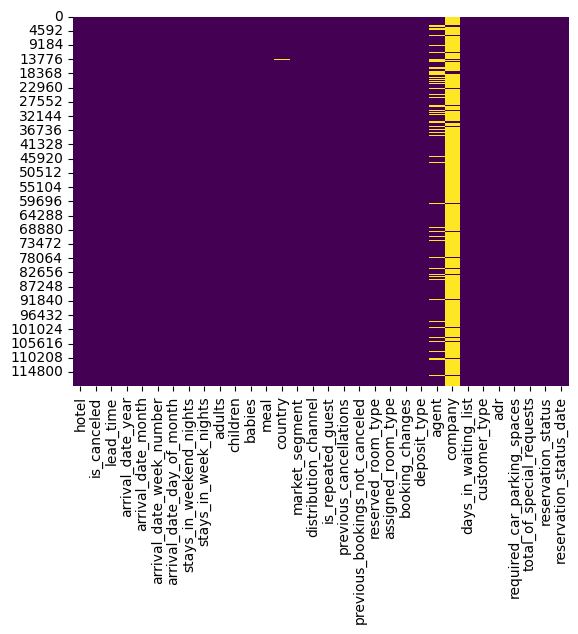

In [20]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap='viridis', cbar=False)

### What did you know about your dataset?

The given dataset is from hotel industry. For a hotel business to remain profitable several factors are important customer retention, increasing adr, decreasing leadtime and add on services increases revenue.

## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407360
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### Variables Description

In [23]:
# 1.  **hotel:**
#     * **Description:** Type of hotel.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** Likely "Resort Hotel" or "City Hotel".

# 2.  **is_canceled:**
#     * **Description:** Indicates if the booking was canceled.
#     * **Data Type:** Binary (int64)
#     * **Possible Values:** `0` (not canceled), `1` (canceled).

# 3.  **lead_time:**
#     * **Description:** Number of days between the date the booking was made and the arrival date.
#     * **Data Type:** Numerical (int64)

# 4.  **arrival_date_year:**
#     * **Description:** Year of arrival date.
#     * **Data Type:** Numerical (int64)

# 5.  **arrival_date_month:**
#     * **Description:** Month of arrival date.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "January", "February", etc.

# 6.  **arrival_date_week_number:**
#     * **Description:** Week number of year for arrival date.
#     * **Data Type:** Numerical (int64)

# 7.  **arrival_date_day_of_month:**
#     * **Description:** Day of month for arrival date.
#     * **Data Type:** Numerical (int64)

# 8.  **stays_in_weekend_nights:**
#     * **Description:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay.
#     * **Data Type:** Numerical (int64)

# 9.  **stays_in_week_nights:**
#     * **Description:** Number of week nights (Monday to Friday) the guest stayed or booked to stay.
#     * **Data Type:** Numerical (int64)

# 10. **adults:**
#     * **Description:** Number of adults included in the booking.
#     * **Data Type:** Numerical (int64)

# 11. **children:**
#     * **Description:** Number of children included in the booking.
#     * **Data Type:** Numerical (float64, likely integer values but stored as float due to NaNs or mixed types).

# 12. **babies:**
#     * **Description:** Number of babies included in the booking.
#     * **Data Type:** Numerical (int64)

# 13. **meal:**
#     * **Description:** Type of meal booked.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "BB" (Bed & Breakfast), "FB" (Full Board), "HB" (Half Board), "SC" (No meal package), "Undefined".

# 14. **country:**
#     * **Description:** Country of origin of the customer.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** Three-letter ISO code (e.g., "PRT" for Portugal, "ESP" for Spain).

# 15. **market_segment:**
#     * **Description:** Designation of the market segment.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "Online TA", "Direct", "Corporate", "Groups", "Complementary", "Aviation", "Undefined".

# 16. **distribution_channel:**
#     * **Description:** Booking distribution channel.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "Direct", "Corporate", "TA/TO" (Travel Agent/Tour Operator), "Undefined", "GDS".

# 17. **is_repeated_guest:**
#     * **Description:** Indicates if the booking was from a repeated guest.
#     * **Data Type:** Binary (int64)
#     * **Possible Values:** `0` (not repeated), `1` (repeated).

# 18. **previous_cancellations:**
#     * **Description:** Number of previous bookings that were canceled by the customer prior to the current booking.
#     * **Data Type:** Numerical (int64)

# 19. **previous_bookings_not_canceled:**
#     * **Description:** Number of previous bookings that were not canceled by the customer prior to the current booking.
#     * **Data Type:** Numerical (int64)

# 20. **reserved_room_type:**
#     * **Description:** Code of the room type reserved by the customer.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "A", "B", "C", etc.

# 21. **assigned_room_type:**
#     * **Description:** Code of the room type assigned to the customer.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "A", "B", "C", etc.

# 22. **booking_changes:**
#     * **Description:** Number of changes made to the booking from the moment it was entered into the PMS (Property Management System) until check-in or cancellation.
#     * **Data Type:** Numerical (int64)

# 23. **deposit_type:**
#     * **Description:** Type of deposit made for the booking.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** e.g., "No Deposit", "Non Refund", "Refundable".

# 24. **agent:**
#     * **Description:** ID of the travel agency that made the booking.
#     * **Data Type:** Numerical (float64, likely integer IDs). Contains many NaN values.

# 25. **company:**
#     * **Description:** ID of the company/entity that made the booking or with whom the booking is associated.
#     * **Data Type:** Numerical (float64, likely integer IDs). Contains many NaN values.

# 26. **days_in_waiting_list:**
#     * **Description:** Number of days the booking was in the waiting list before it was confirmed or canceled.
#     * **Data Type:** Numerical (int64)

# 27. **customer_type:**
#     * **Description:** Type of customer, indicating their primary purpose of travel or relationship with the hotel.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** "Transient", "Contract", "Group", "Transient-Party".

# 28. **adr:**
#     * **Description:** Average Daily Rate (ADR) - calculated by dividing the sum of all lodging transactions by the total number of nights.
#     * **Data Type:** Numerical (float64)

# 29. **required_car_parking_spaces:**
#     * **Description:** Number of car parking spaces required by the customer.
#     * **Data Type:** Numerical (int64)

# 30. **total_of_special_requests:**
#     * **Description:** Number of special requests made by the customer (e.g., twin bed, high floor).
#     * **Data Type:** Numerical (int64)

# 31. **reservation_status:**
#     * **Description:** Last reservation status, indicating if the booking was confirmed, canceled, or checked-out.
#     * **Data Type:** Categorical (object)
#     * **Possible Values:** "Canceled", "Check-Out", "No-Show".

# 32. **reservation_status_date:**
#     * **Description:** Date at which the last reservation status was set.
#     * **Data Type:** Datetime (datetime64[ns])

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.
dataset= df.copy()
dataset.head()
df['length_of_stay']=df['stays_in_weekend_nights']+ df['stays_in_week_nights']
df['room_change'] = df['reserved_room_type'] != df['assigned_room_type']
print(df[['stays_in_weekend_nights', 'stays_in_week_nights', 'length_of_stay']].head(10))


   stays_in_weekend_nights  stays_in_week_nights  length_of_stay
0                        0                     0               0
1                        0                     0               0
2                        0                     1               1
3                        0                     1               1
4                        0                     2               2
5                        0                     2               2
6                        0                     2               2
7                        0                     2               2
8                        0                     3               3
9                        0                     3               3


### What all manipulations have you done and insights you found?

The analysis involved two key manipulations: creating length_of_stay by summing weekend and weekday nights to simplify stay duration analysis, and adding a room_change boolean column to flag discrepancies between reserved and assigned room types. These new features are crucial for understanding guest behavior, as length_of_stay allows for direct correlation with metrics like ADR and cancellation rates, while room_change is pivotal for investigating the surprising insight that room changes are associated with fewer cancellations, prompting deeper inquiry into operational efficiency and guest satisfaction.

## 















***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

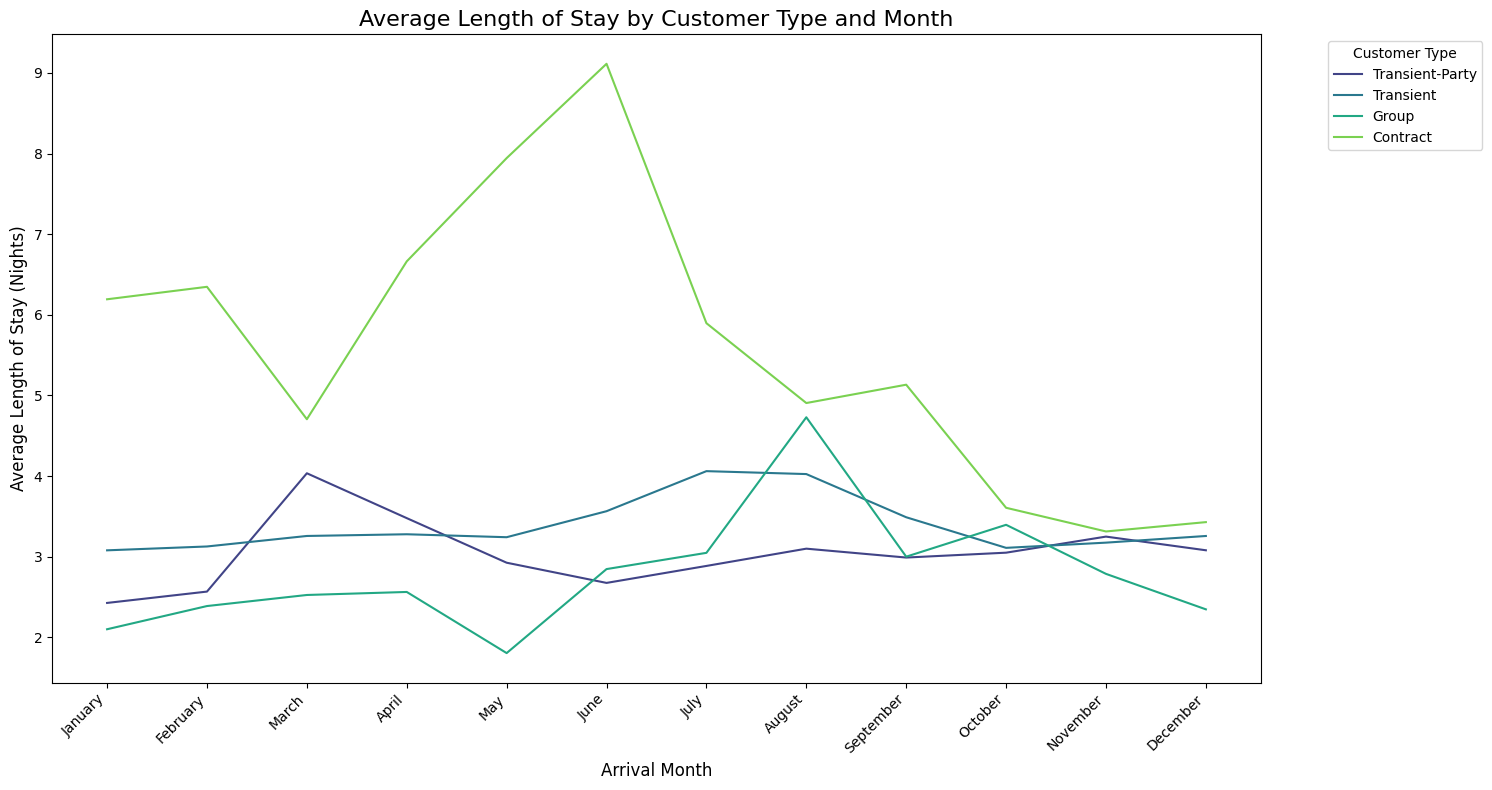

In [26]:
# Chart - 1 visualization code
# comparison between lenght of stay and consumer demographic 
monthly_stay = df.groupby(['arrival_date_month', 'customer_type'])['length_of_stay'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
monthly_stay['arrival_date_month'] = pd.Categorical(monthly_stay['arrival_date_month'], categories=month_order, ordered=True)
monthly_stay = monthly_stay.sort_values('arrival_date_month')
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=monthly_stay,
    x='arrival_date_month',
    y='length_of_stay',
    hue='customer_type',
    palette='viridis'
)
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Length of Stay (Nights)', fontsize=12)
plt.title('Average Length of Stay by Customer Type and Month', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



##### 1. Why did you pick the specific chart?

In Hospitality industry, a business's top prioirty is always to retain it's large customers and to know that you have to know your consumer demographics. And Line graph is easier to study, quickly understand data. In addition, line graph enhances our perception of finding trends that might be missed when analzing in the tabular form, also its much easier and quickly spot similarities, differences, or diverging patterns.

##### 2. What is/are the insight(s) found from the chart?

We found out that contract are the major stayer in 1st half of year and decline in 2nd half.                                                         
Duration of group tours decline in 2nd half too
transient consumers stay almost same through out the year

##### 3. Will the gained insights help creating a positive business impact?
Long stays are bring in more revenue as they help in upselling other facilities like parking,F&B,tours etc.                                          
Managment should promote offer to increase stay duration in 2nd half of the year                                                                     
Increasing contracts in 2nd half should increase revenue 

#### Chart - 2

In [27]:
# Chart - 2 visualization code

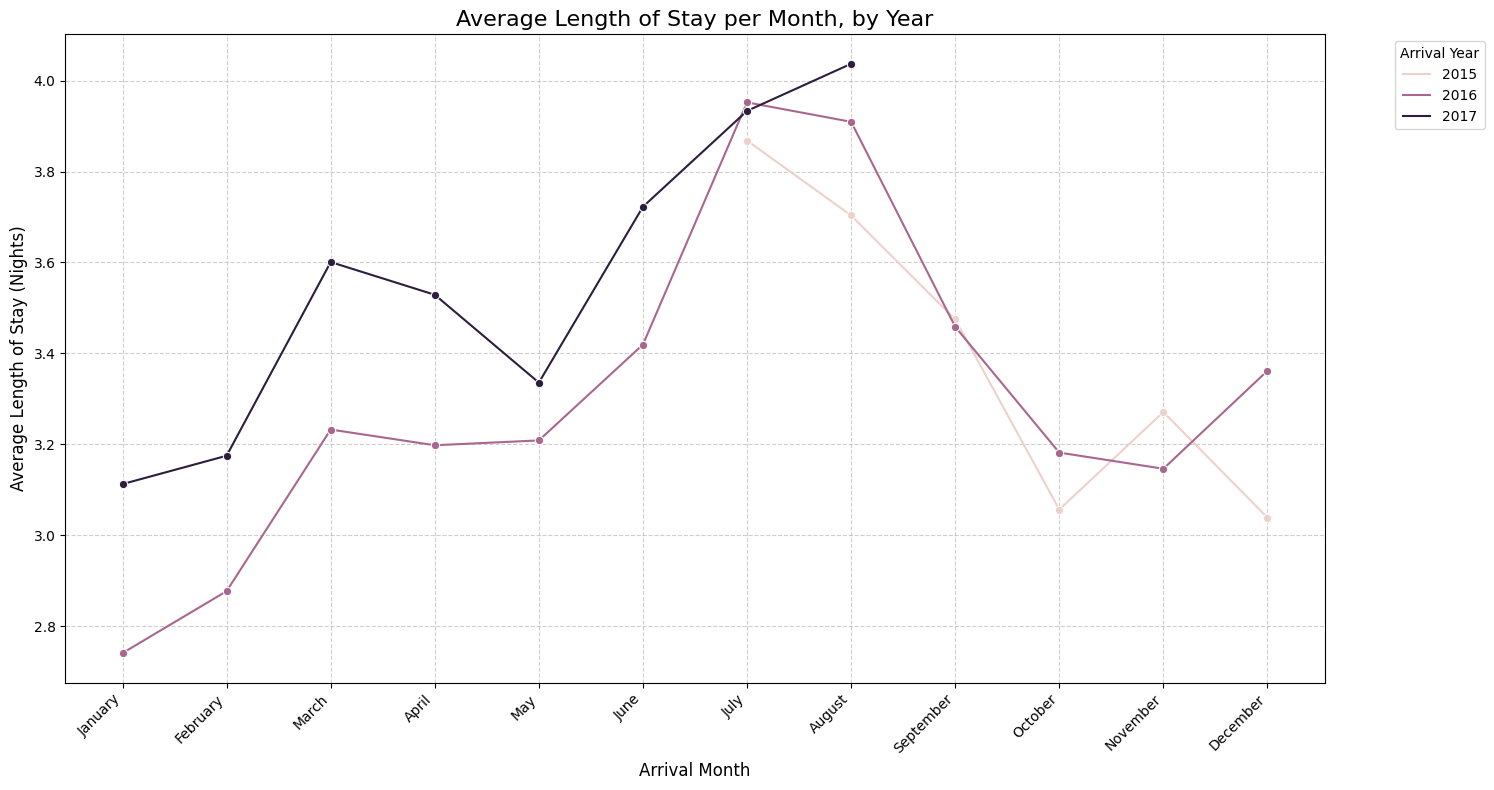

In [28]:
monthly_yearly_stay = df.groupby(['arrival_date_year', 'arrival_date_month'])['length_of_stay'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
monthly_yearly_stay['arrival_date_month'] = pd.Categorical(monthly_yearly_stay['arrival_date_month'], categories=month_order, ordered=True)
monthly_yearly_stay = monthly_yearly_stay.sort_values('arrival_date_month')
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_yearly_stay,x='arrival_date_month',y='length_of_stay',hue='arrival_date_year', marker='o')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Length of Stay (Nights)', fontsize=12)
plt.title('Average Length of Stay per Month, by Year', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Arrival Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


##### 1. Why did you pick the specific chart?

1. Line graph as mentioned eariler are a good way to draw comparison and spot trends and fluctuations over time.
2. Helps in forcasting future trends which are a important way to stay ahead of competition
3. Clutter free hence less distracting
4. Since we are dealing here with continous flow of time not with discrete points in time therefore linear graph is a good way to depict flow of time

##### 2. What is/are the insight(s) found from the chart?

1. lenght of stay follows a seasonal cycle with peaks and dips
2. It peaks in July and August
3. Lenght of stay is showing positive growth year on year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,Managment can implement following for positive impact
1. Implementing dynamic staffing: hireing more staff for peak months
2. Longer stay packages: for longer stay in non peak months, implement offer such as 3+1 night free etc.
3. Dynamic pricing: helps in increasing adr during peak months
4. Adding more contracts for the year end and parterning with tour agency.

#### Chart - 3

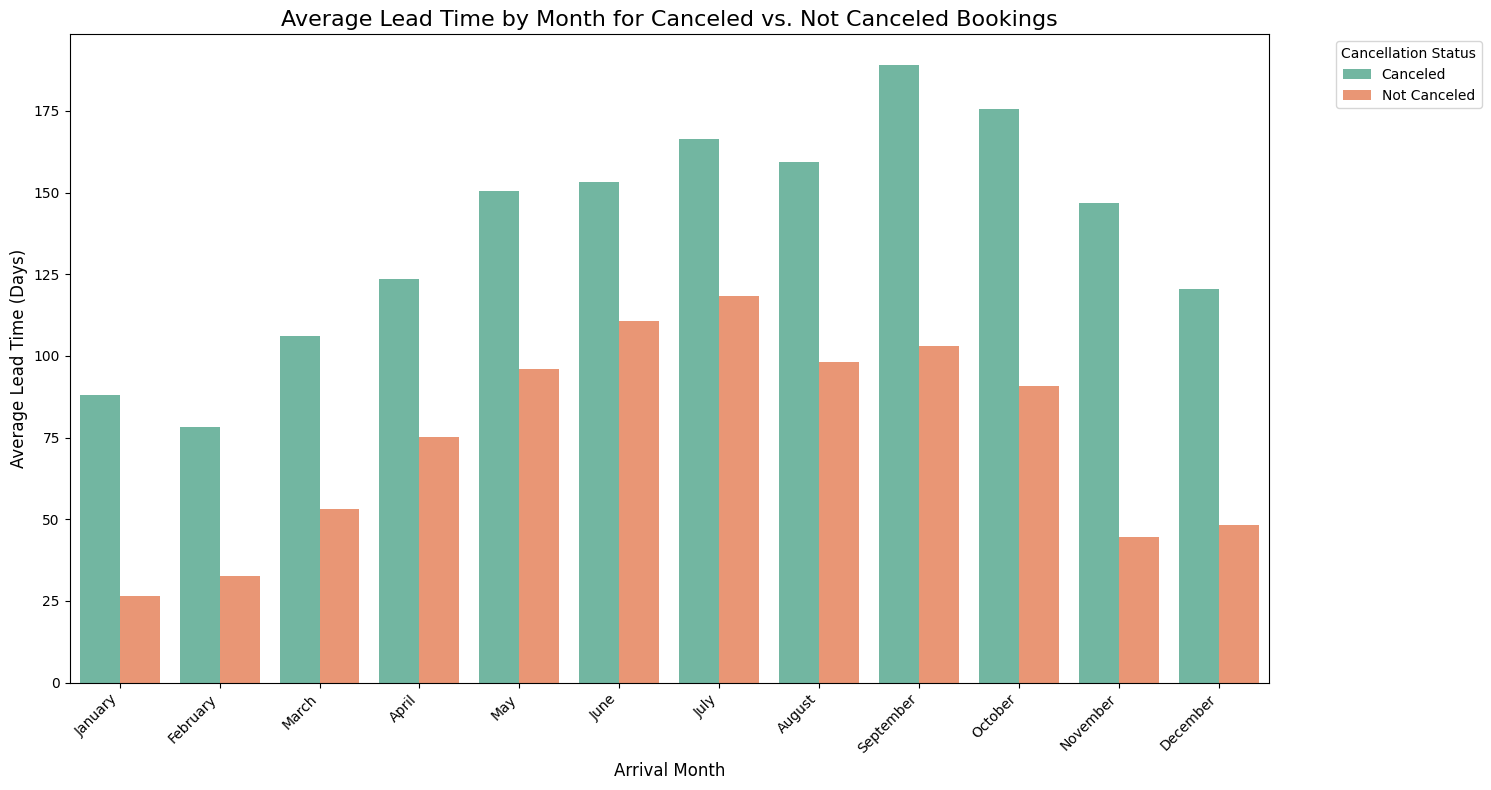

In [29]:
# Chart - 3 visualization code
df['cancellation_status'] = df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_lead_time_by_status = df.groupby(['arrival_date_month', 'cancellation_status'])['lead_time'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_lead_time_by_status,x='arrival_date_month',y='lead_time',hue='cancellation_status',palette='Set2')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.title('Average Lead Time by Month for Canceled vs. Not Canceled Bookings', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

1. We can clearly see that Booking with more lead time get canceled more.
2. Confirmed booking are following a seasonal pattern/ trend with peak in summer
3. Whereas canceled booking peak in autumn and early winter

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
1. Enforce a maximum booking lead time of 60 days from the booking date to the arrival date.
2. Charges for last minute cancellations

#### Chart - 4

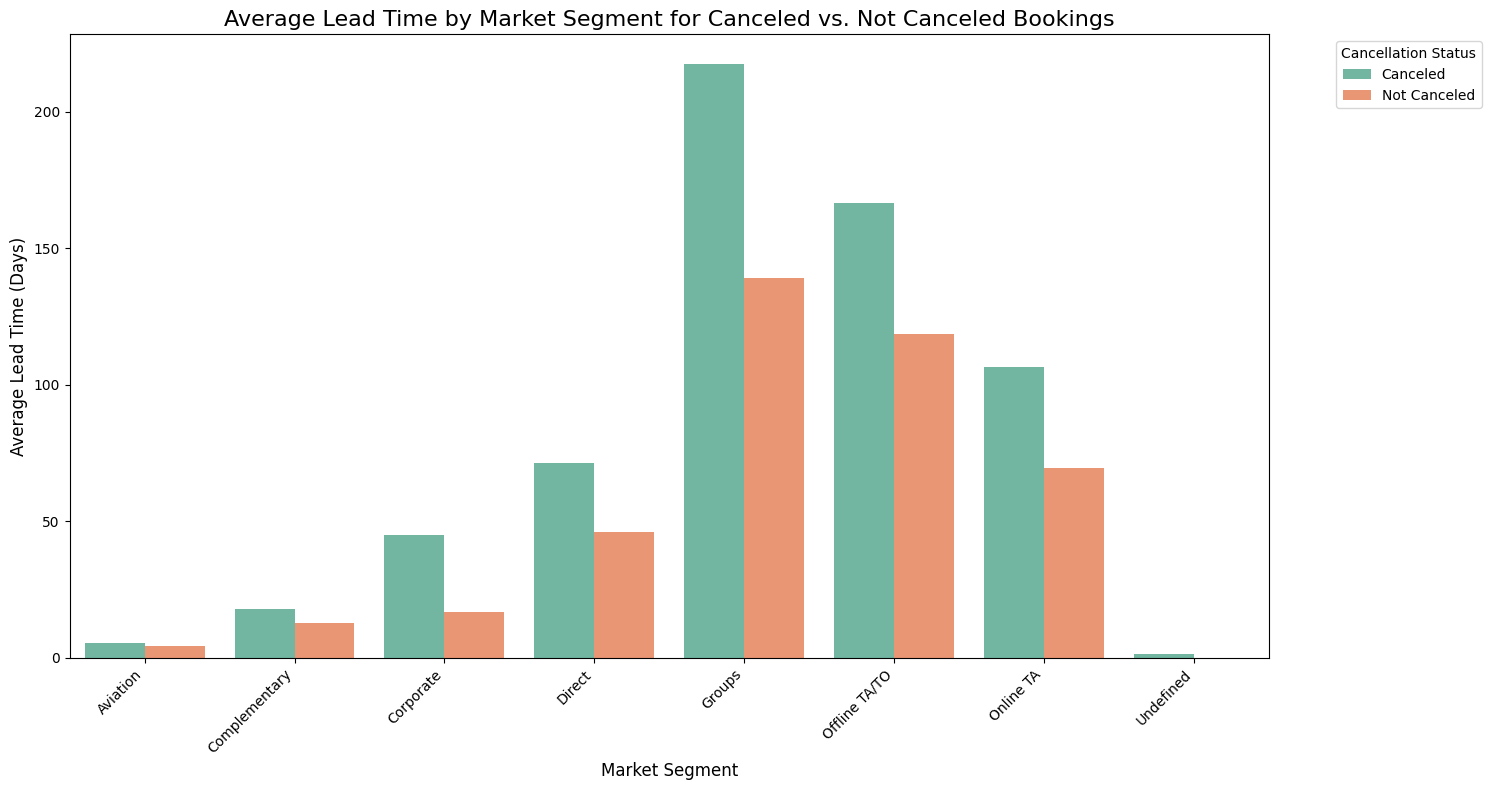

In [30]:
# Chart - 4 visualization code
df['cancellation_status'] = df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_lead_time_by_status = df.groupby(['market_segment', 'cancellation_status'])['lead_time'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_lead_time_by_status,x='market_segment',y='lead_time',hue='cancellation_status',palette='Set2')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.title('Average Lead Time by Market Segment for Canceled vs. Not Canceled Bookings', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

1. Groups segment poses highest risk of cancellation
2. High lead time is indicator of cancellation
3. TA & TO are high risk segment
4. Corporate and Direct booking are most reliable

##### 3. Will the gained insights help creating a positive business impact?
Yes;
1. Exploring more of the direct and corporate segment to ensure more stable income
2. Launching offers that promote direct and coporaete segment
3. adjusting overbook forcasting according to past trends to minimise loss
4. introducing stricter cancellation norms

Answer Here

#### Chart - 5

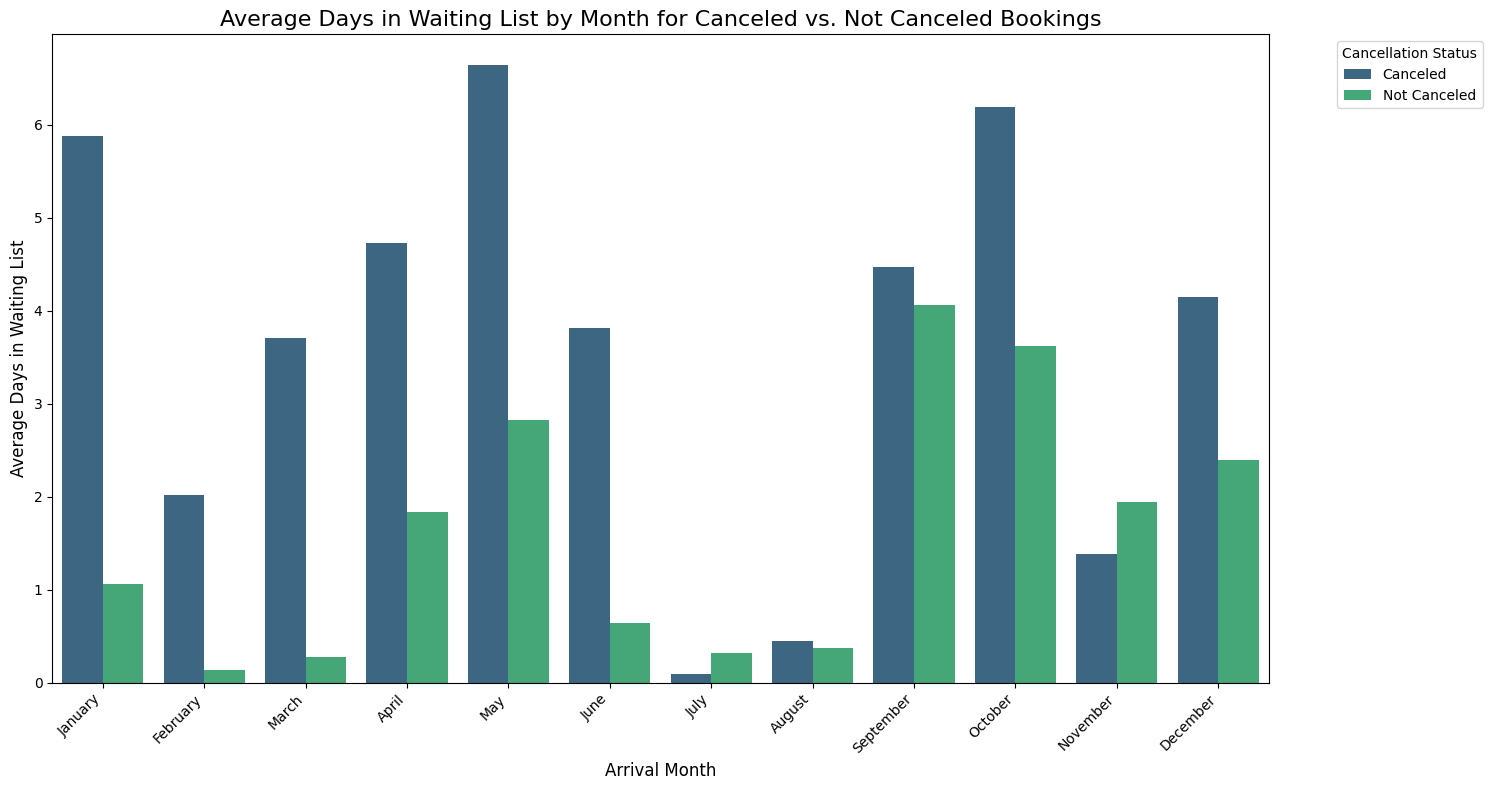

In [31]:
# Chart - 5 visualization code
# relation btw waiting list, cancelation, and month 
df['cancellation_status'] = df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_waiting_list_by_status = df.groupby(['arrival_date_month', 'cancellation_status'])['days_in_waiting_list'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_waiting_list_by_status,x='arrival_date_month',y='days_in_waiting_list',hue='cancellation_status',palette='viridis')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Days in Waiting List', fontsize=12)
plt.title('Average Days in Waiting List by Month for Canceled vs. Not Canceled Bookings', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

1. Extremely high cancellations for guests in waiting list for almost along the year except July, August and Novemmber
2. Being in waiting list is a huge sell off for customer

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Improving Waiting List Conversion
2. Refining Inventory and Overbooking Strategy for Peak Months
3. Enhancing Customer Communication

#### Chart - 6

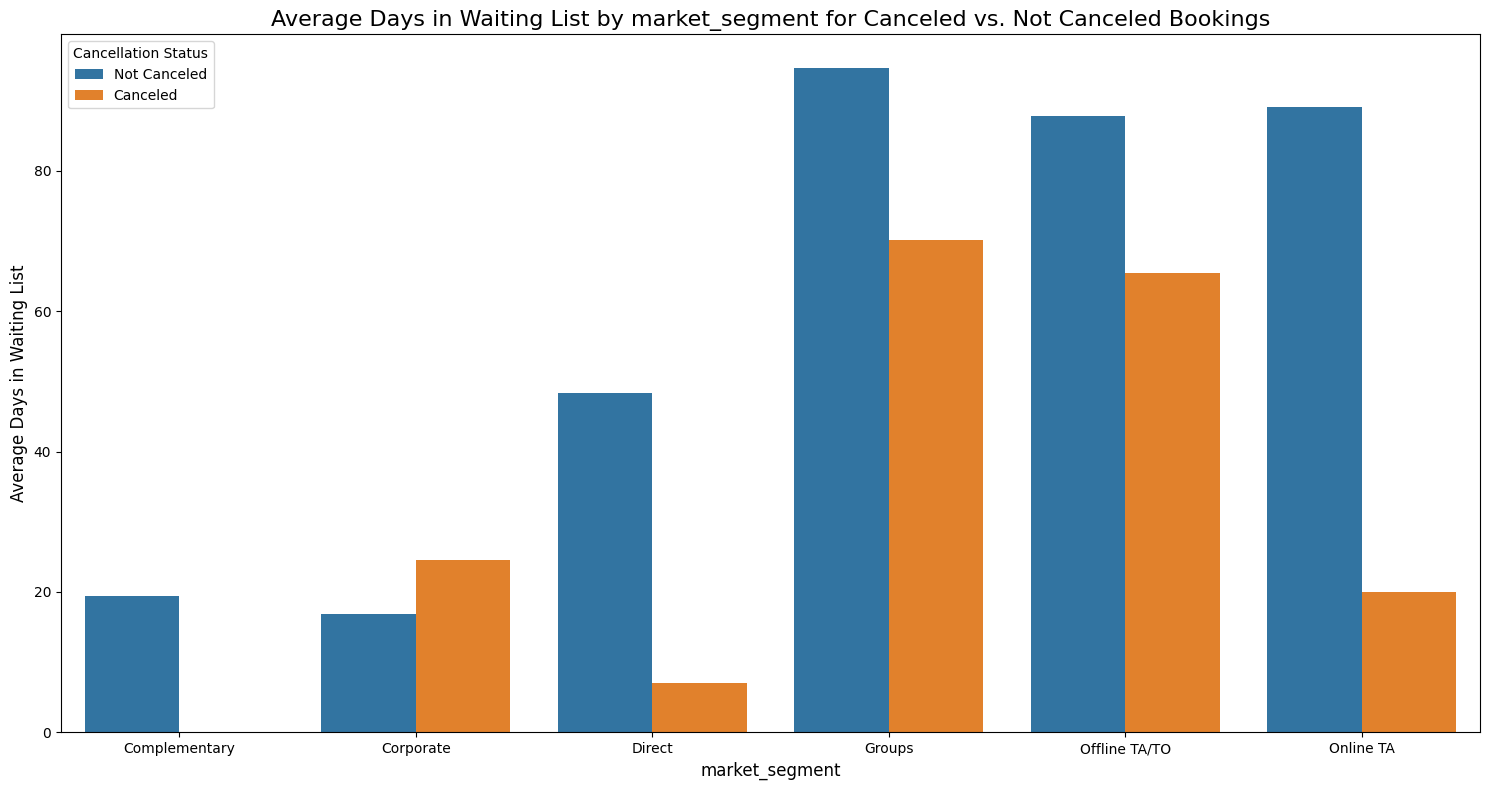

In [32]:
# Chart - 6 visualization code
df_waiting = df[df['days_in_waiting_list'] > 0].copy()
df_waiting['cancellation_status'] = df_waiting['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
waiting_list_by_adults = df_waiting.groupby(['market_segment', 'cancellation_status'])['days_in_waiting_list'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=waiting_list_by_adults,x='market_segment',y='days_in_waiting_list',hue='cancellation_status',)
plt.xlabel('market_segment', fontsize=12)
plt.ylabel('Average Days in Waiting List', fontsize=12)
plt.title('Average Days in Waiting List by market_segment for Canceled vs. Not Canceled Bookings', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status',loc='upper left')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

1. Corporate is the only segment with more cancellations
2. Direct, Complementary and Online TA has low Cancellations

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Implement Rapid Room allocation to less paitince customer segment and provide other option in case of Room not availble
2. For Segments with high paitence prioritize them after lesser ones
3. Keep interacting with high paitence one to let them know of your services in advance for higher revenue

#### Chart - 7

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Aviation'),
  Text(1.5, 0, 'Complementary'),
  Text(2.5, 0, 'Corporate'),
  Text(3.5, 0, 'Direct'),
  Text(4.5, 0, 'Groups'),
  Text(5.5, 0, 'Offline TA/TO'),
  Text(6.5, 0, 'Online TA'),
  Text(7.5, 0, 'Undefined')])

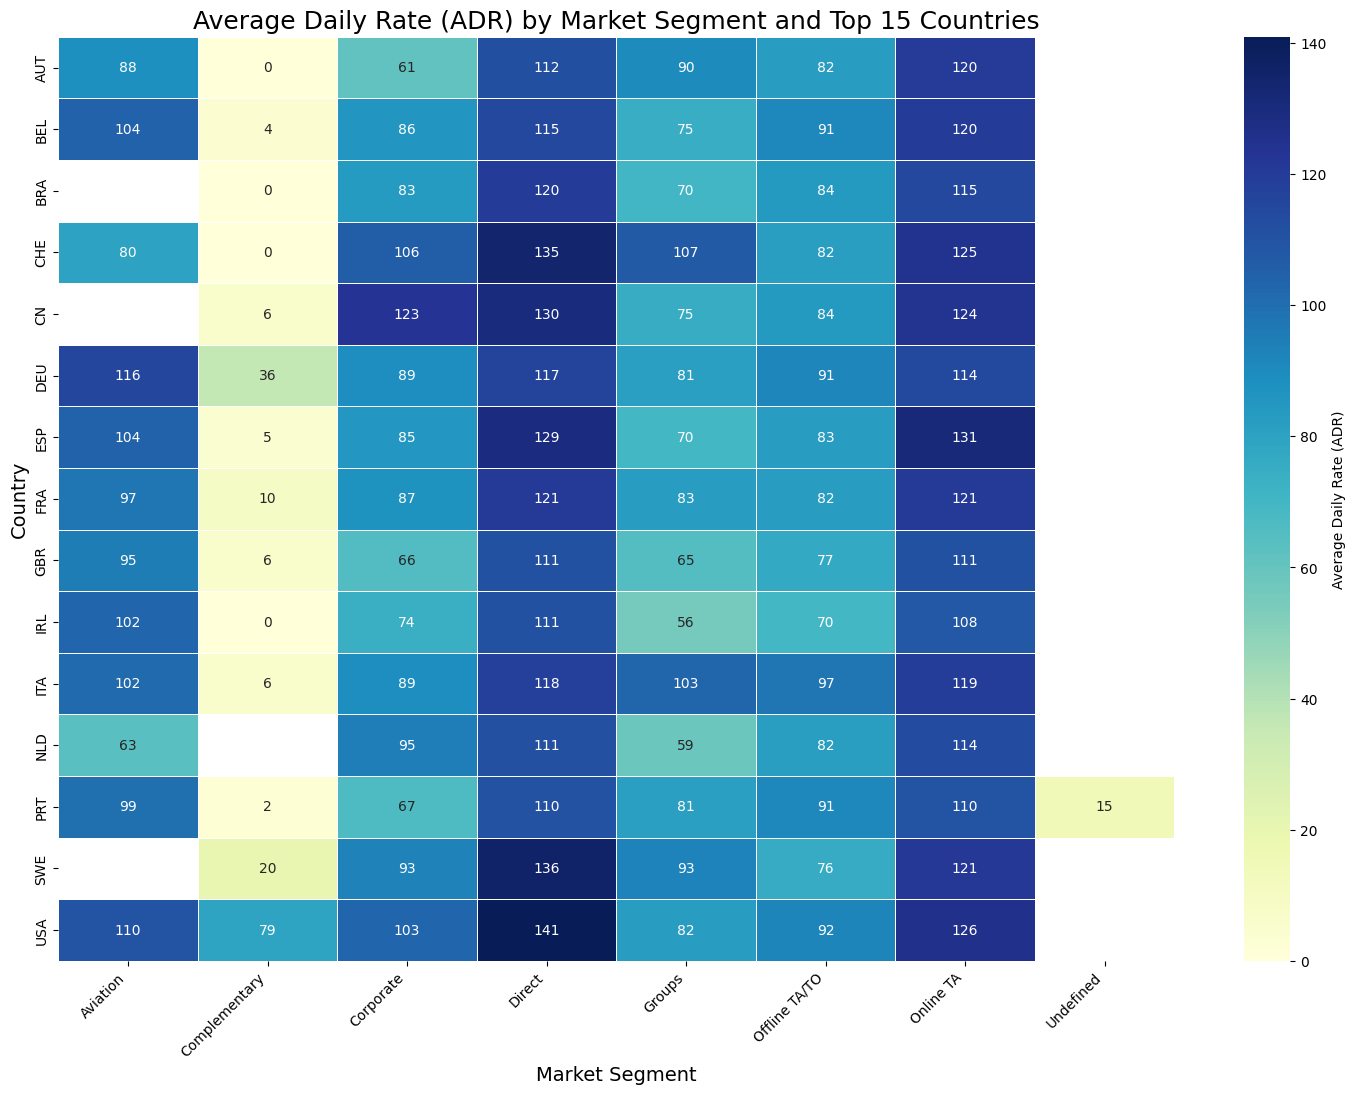

In [33]:
# Chart - 7 visualization code
#plotting adr for top15 countries
top_15_countries = df['country'].value_counts().nlargest(15).index
df_filtered = df[df['country'].isin(top_15_countries)]
df['adr'].fillna(0, inplace=True)
heatmap_data = df_filtered.pivot_table(values='adr',index='country',columns='market_segment',aggfunc='mean')
plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_data,annot=True,fmt=".0f",cmap="YlGnBu",linewidths=.5,cbar_kws={'label': 'Average Daily Rate (ADR)'})
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Average Daily Rate (ADR) by Market Segment and Top 15 Countries', fontsize=18)
plt.xticks(rotation=45, ha='right')

##### 1. Why did you pick the specific chart?

* It lets you see average adr for each combination of country and market segment using a color gradient.
* This  is much more readable than a bar chart for a large number of countries.

##### 2. What is/are the insight(s) found from the chart?

1. Tell us about peak booking category of a specific country
2. What category of customer comes from a specific country
3. Which customer brings in more revenue

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Adoppting better operational efficiecny methods
2. Using promotional targeting, detailed data helps in targeting specific customers
3. Trust or loyalty programmes, and personalied marketing
4. Better staffing and resource allocation

#### Chart - 9

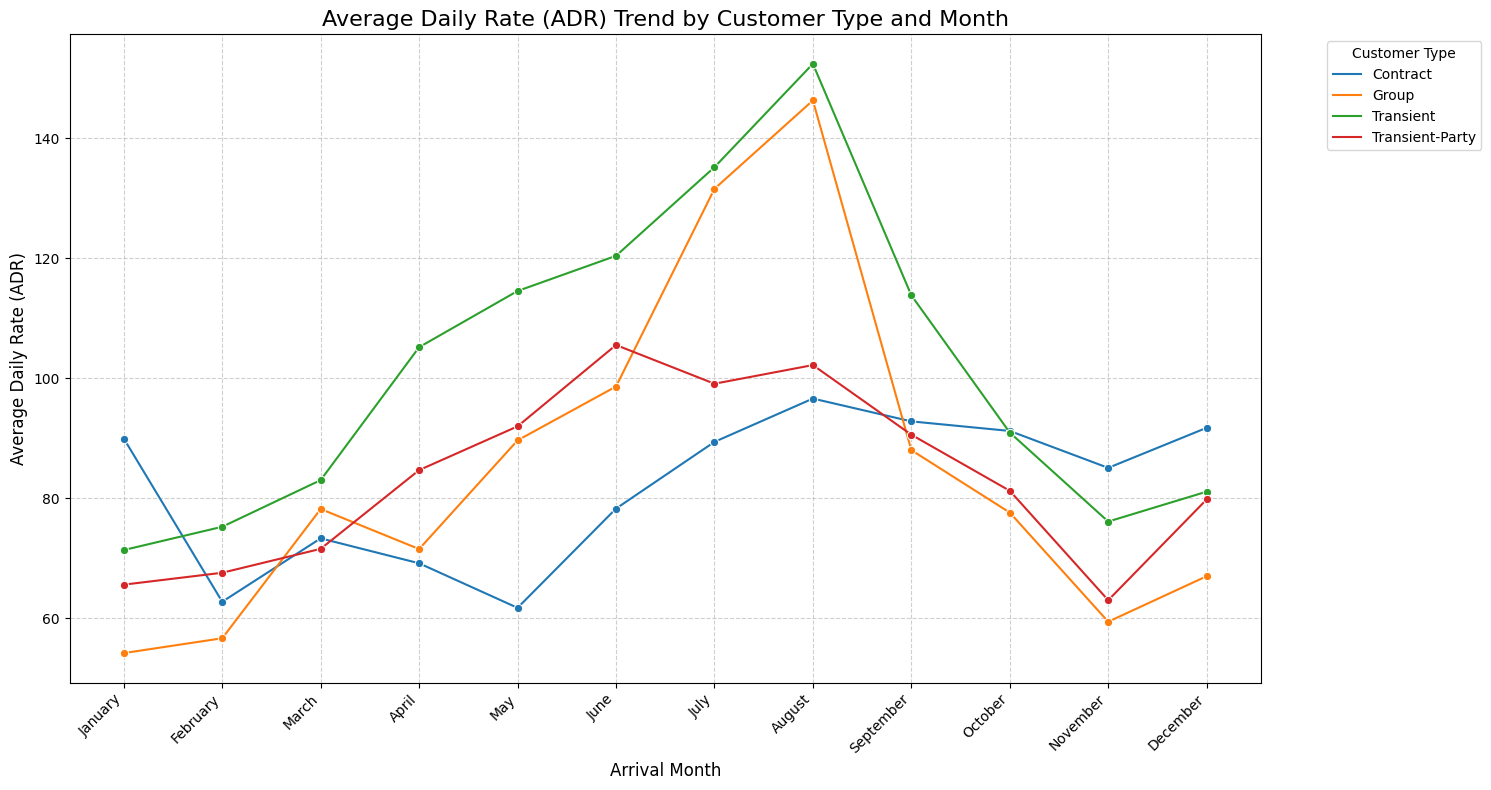

In [34]:
# Chart - 9 visualization code
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_adr_by_customer_type = df.groupby(['arrival_date_month', 'customer_type'])['adr'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_adr_by_customer_type,x='arrival_date_month',y='adr',hue='customer_type',marker='o',dashes=False)
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.title('Average Daily Rate (ADR) Trend by Customer Type and Month', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


##### 1. Why did you pick the specific chart?

1. It shows trends over time which makes it  excellent for visualizing changes in data over a continuous period.
2. Data Points are Connected by Lines for eg: Straight line segments connecting individual data points.
3. It Indicates direction and rate of change through slope of line
4. Effective for Comparing Multiple comparison 

##### 2. What is/are the insight(s) found from the chart?

1. Contracts type consumer have lowest adr in may
2. Overall adr declines after august
3. Peak season is summer
4. group adr is highly unstable

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Steep decline in adr post august so 
2. Low ADR Across All Segments in Off-Peak Months

#### Chart - 10

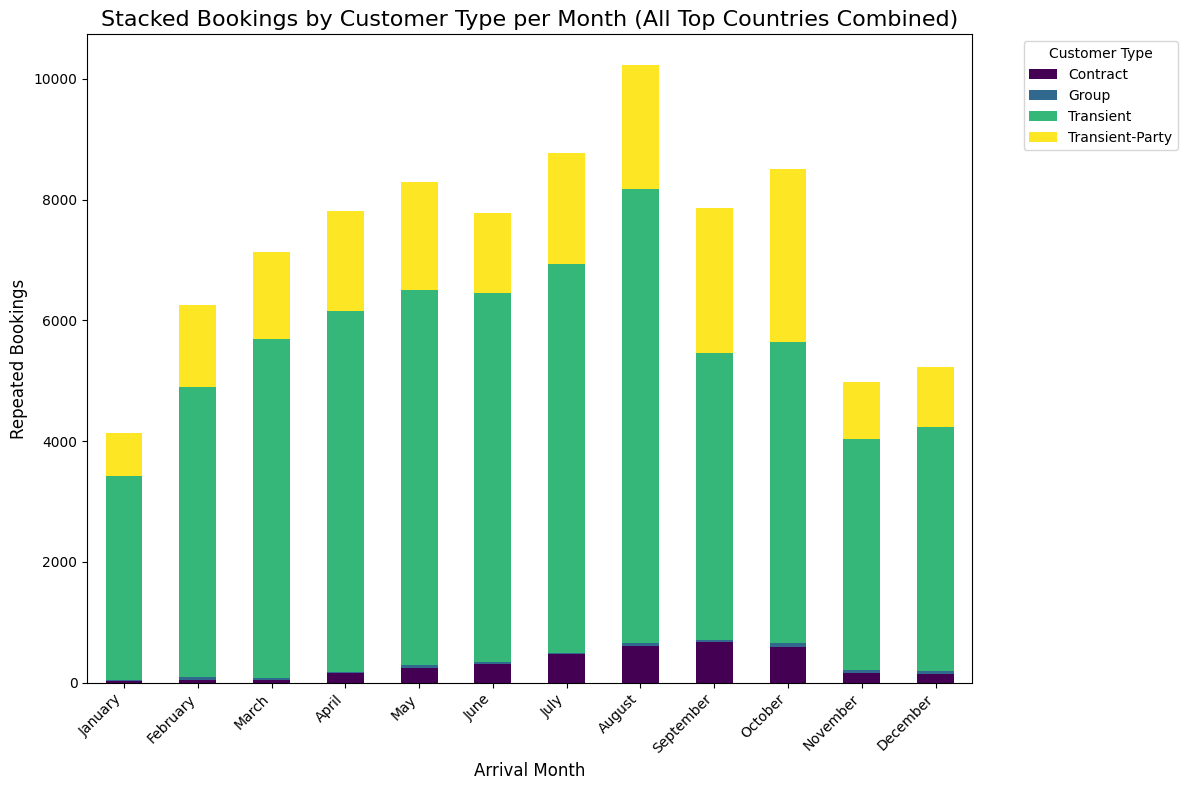

In [35]:
top_countries = df['country'].value_counts().nlargest(5).index
df_filtered = df[df['country'].isin(top_countries)].copy() 
df_filtered['arrival_date_month'] = pd.Categorical(df_filtered['arrival_date_month'], categories=month_order, ordered=True)
customer_types = df_filtered['customer_type'].unique()
customer_types.sort()
stacked_data_combined = df_filtered.groupby(['arrival_date_month', 'customer_type']).size().unstack(fill_value=0)
for ct in customer_types:
    if ct not in stacked_data_combined.columns:
        stacked_data_combined[ct] = 0
stacked_data_combined = stacked_data_combined[customer_types]
plt.figure(figsize=(12, 8))
stacked_data_combined.plot(kind='bar',stacked=True,ax=plt.gca(), cmap='viridis')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Repeated Bookings', fontsize=12)
plt.title('Stacked Bookings by Customer Type per Month (All Top Countries Combined)', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

1. Dominance of "Transient" Bookings
2. Seasonal Peaks in Summer
3. Lowest Bookings in Winter/Early Year
4. Minimal Contribution from Contract and Group

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Heavy Reliance on "Transient" Segment (Lack of Diversification in Repeated Bookings):
Failure to Convert "Contract" and "Group" into Repeat Customers:

#### Chart - 11

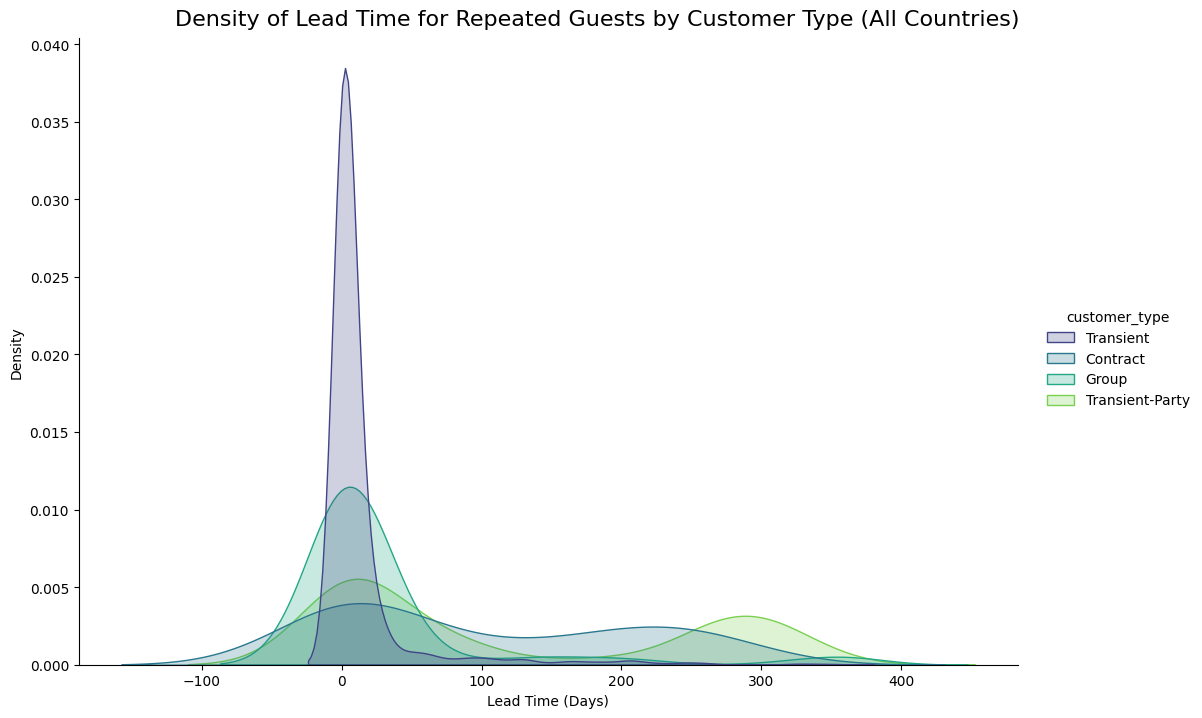

In [36]:
# Chart 11 
df_repeated = df[df['is_repeated_guest'] == 1].copy()
df_filtered = df_repeated.copy()
g = sns.displot(data=df_filtered,x='lead_time',hue='customer_type',kind='kde',fill=True,palette='viridis',height=7,aspect=1.5,common_norm=False)
g.set_axis_labels("Lead Time (Days)", "Density")
g.fig.suptitle('Density of Lead Time for Repeated Guests by Customer Type (All Countries)', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

It effectively visualizes the shape of the distribution of "Lead Time (Days)" for each customer type, including where the data is concentrated (peaks), its spread, and any skewness.
It allows for easy comparison of the lead time distributions across different "Customer Types" on the same scale, highlighting differences in their booking behavior. The overlapping areas indicate where distributions share similar lead times.

##### 2. What is/are the insight(s) found from the chart?

1."Transient" Bookings are Heavily Last-Minute
2. Predominance of Short Lead Times
3.Longer Lead Times for Transient-Party Group
4."Contract" has the Narrowest Spread

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High density of last-minute bookings for "Transient" guests
Different lead time behaviors for different customer types.
 Understanding when different customer types book

#### Chart - 12

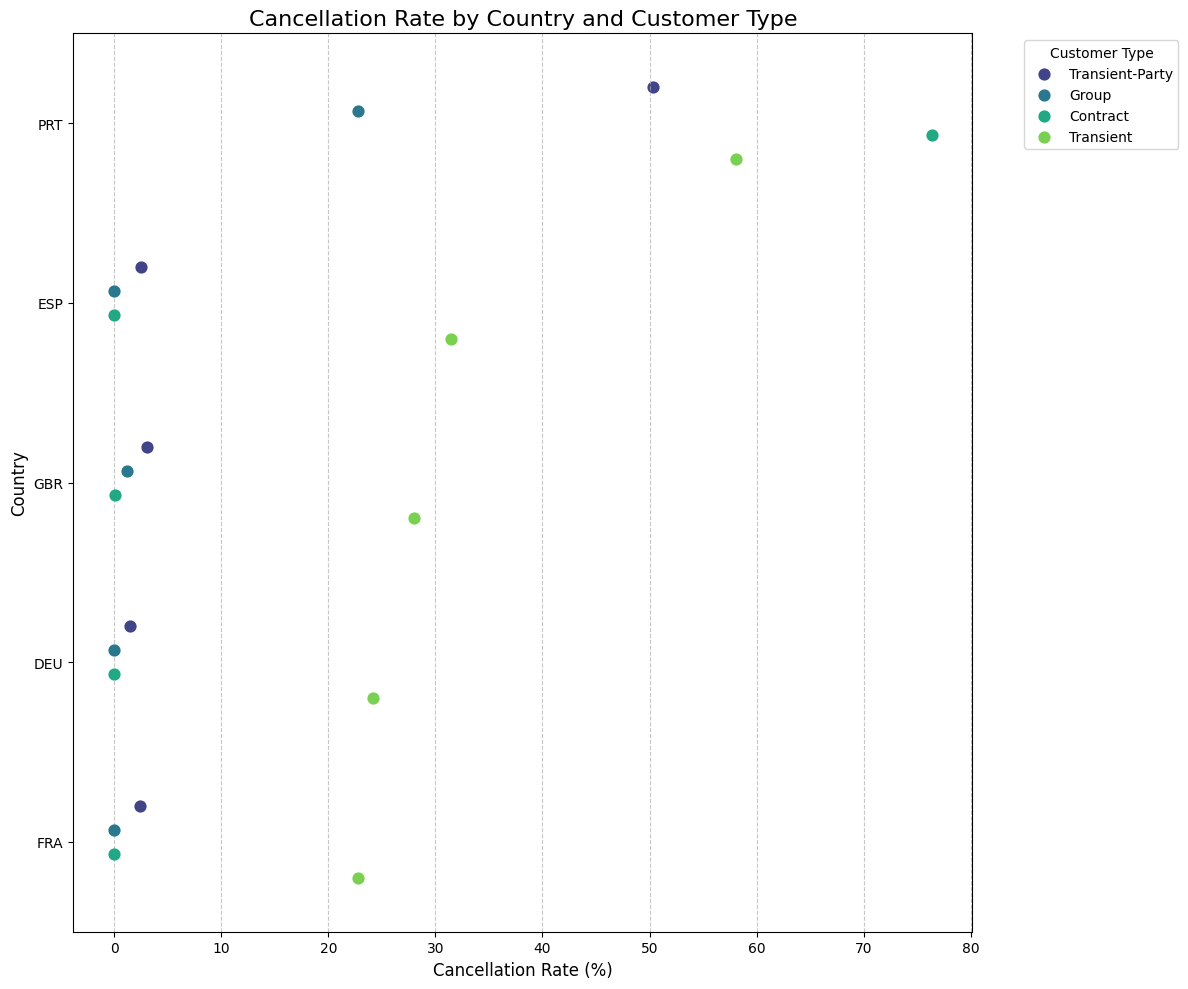

In [37]:
top_countries = df['country'].value_counts().nlargest(5).index
df_filtered = df[df['country'].isin(top_countries)].copy()
df['cancellation_status'] = df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
cancellation_rates = df_filtered.groupby(['country', 'customer_type'])['is_canceled'].mean().reset_index()
cancellation_rates['cancellation_rate'] = cancellation_rates['is_canceled'] * 100
country_avg_cancel_rate = cancellation_rates.groupby('country')['cancellation_rate'].mean().sort_values(ascending=False).index
cancellation_rates['country'] = pd.Categorical(cancellation_rates['country'], categories=country_avg_cancel_rate, ordered=True)
cancellation_rates = cancellation_rates.sort_values('country')
plt.figure(figsize=(12, 10))
sns.pointplot(data=cancellation_rates,x='cancellation_rate',y='country',hue='customer_type',join=False,palette='viridis',dodge=0.4,linestyles='' )
plt.xlabel('Cancellation Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Cancellation Rate by Country and Customer Type', fontsize=16)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Shows Relationship between Two Numerical Variables
Identifies Clusters and Outliers
Compares Multiple Categories Simultaneously
No Implicit Trend Line

##### 2. What is/are the insight(s) found from the chart?

"Transient" Customers Have High Cancellation Rates
"Group" Customers Also Show High Cancellations in Some Cases
Contract" Customers Generally Have Low Cancellation Rates

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Revenue Optimization through Cancellation Management:
Targeted Marketing and Loyalty Programs
Improved Forecasting and Inventory Management

#### Chart - 13

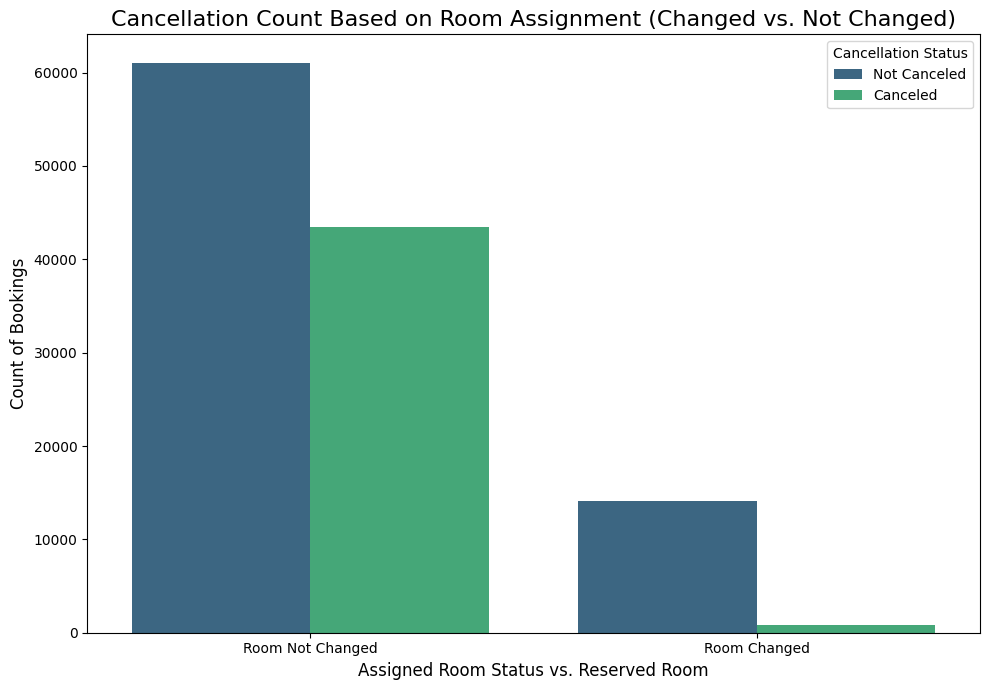

In [38]:
# Chart - 13 visualization code
df['room_change'] = df['reserved_room_type'] != df['assigned_room_type']
df['room_change'] = df['room_change'].map({True: 'Room Changed', False: 'Room Not Changed'})
df['cancellation_status'] = df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
df_filtered = df[df['reserved_room_type'].notna() & df['assigned_room_type'].notna()]
plt.figure(figsize=(10, 7))
sns.countplot(data=df_filtered,x='room_change',hue='cancellation_status',palette='viridis')
plt.xlabel('Assigned Room Status vs. Reserved Room', fontsize=12)
plt.ylabel('Count of Bookings', fontsize=12)
plt.title('Cancellation Count Based on Room Assignment (Changed vs. Not Changed)', fontsize=16)
plt.legend(title='Cancellation Status')
plt.tight_layout()


##### 1. Why did you pick the specific chart?

1. Bar charts are excellent when comparing two different categories.
2. Give clear representation of the data
3. Neat and clutter free
4. Great choice when comparing data over discrete point of time

##### 2. What is/are the insight(s) found from the chart?

Vast Majority of Bookings Do Not Have Room Changes
Room Changes Drastically Reduce Cancellations
High Cancellation Rate When Room is NOT Changed:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Re-evaluating Room Assignment Strategies
Focusing on Root Causes of Cancellation 

#### Chart - 14 - Correlation Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Aviation'),
  Text(1.5, 0, 'Complementary'),
  Text(2.5, 0, 'Corporate'),
  Text(3.5, 0, 'Direct'),
  Text(4.5, 0, 'Groups'),
  Text(5.5, 0, 'Offline TA/TO'),
  Text(6.5, 0, 'Online TA'),
  Text(7.5, 0, 'Undefined')])

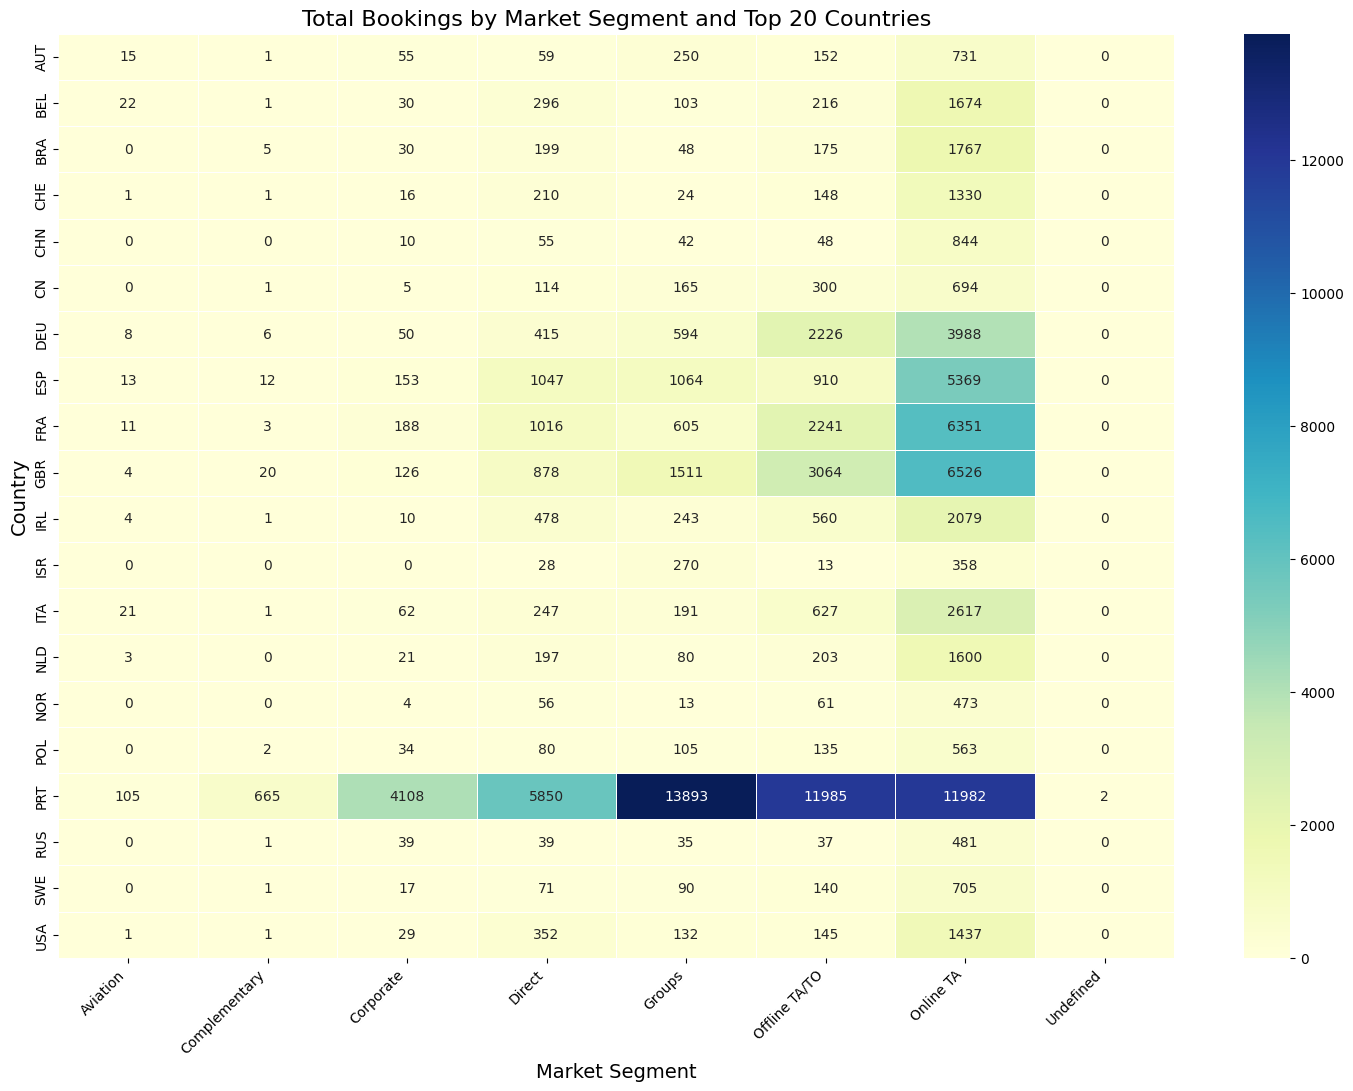

In [39]:
# Correlation Heatmap visualization code
# Chart - 14 visualization code
# filtering data on basis of totalbooking by the countries and market segmenet
top_countries = df['country'].value_counts().nlargest(20).index
df_filtered = df[df['country'].isin(top_countries)]
heatmap_data = df_filtered.groupby(['country', 'market_segment']).size().reset_index(name='booking_count')
pivot_table_data = heatmap_data.pivot_table(values='booking_count',index='country',columns='market_segment',fill_value=0)
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table_data,annot=True,fmt=".0f",cmap="YlGnBu",linewidths=.5,linecolor='white')
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Total Bookings by Market Segment and Top 20 Countries', fontsize=16)
plt.xticks(rotation=45, ha='right')

##### 1. Why did you pick the specific chart?

To plot the relationship between country, market_segment, and month, a single 2D plot would be too complex to read. A heatmap is an excellent choice for visualizing the relationship between two categorical variables by showing a numerical value in a color gradient.

##### 2. What is/are the insight(s) found from the chart?

* Corporate and Complementary are Generally Low
* Overall Booking trends
* Limited Bookings for Many Countries
* Portugal hold major share of customers

#### Chart - 15 - Pair Plot

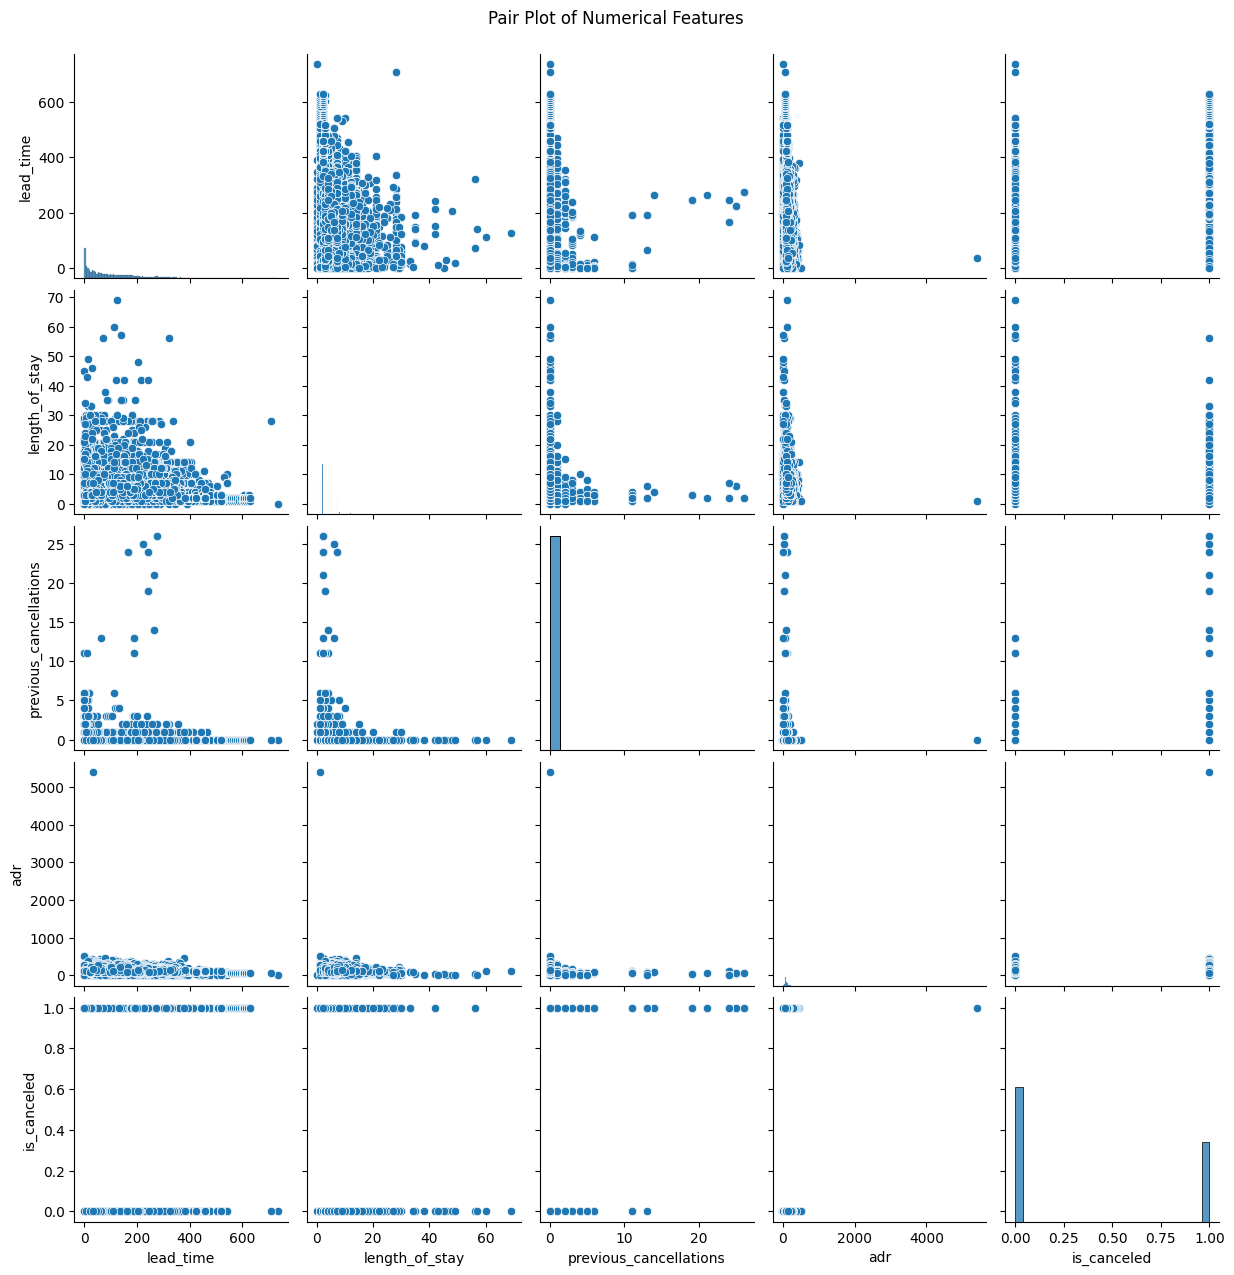

In [40]:
# Pair Plot visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = [
    'lead_time',
    'length_of_stay',
    'previous_cancellations',
    'adr',
    'is_canceled' 
]
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. 1. Why did you pick the specific chart?

It efficiently visualizes the relationships (and lack thereof) between all selected numerical variables in a single view. Each scatterplot shows the correlation between two variables, while the diagonal displays the distribution of individual variables.
It's an excellent tool for the initial stages of Exploratory Data Analysis (EDA) to quickly spot potential correlations, clusters, outliers, and the overall shape of individual variable distributions.

##### 2. What is/are the insight(s) found from the chart?

There appears to be a positive correlation between lead_time and is_canceled. As lead time increases, the likelihood of cancellation (is_canceled=1) also seems to increase, with many cancellations occurring for bookings made hundreds of days in advance.
 There's a visible but not extremely strong positive correlation between lead_time and length_of_stay. Longer stays tend to be booked further in advance, but there are also many short stays booked with long lead times.
 

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. "Online TA" and "Direct" bookings are the overwhelming primary revenue drivers.
2. Portugal (PRT) is a standout market, particularly for "Groups," showing exceptionally high booking volumes, followed by Spain (ESP) and France (FRA). This highlights key regions for focused efforts.
3. A surprising finding is that bookings where the assigned room matched the reserved room ("Room Not Changed") show a much higher cancellation count compared to bookings where the room was changed. This suggests that actual room assignment discrepancies are not the primary driver for a large portion of cancellations.
4. There's a sharp decline in ADR and bookings post-August, indicating a critical period for demand stimulation.

# **Conclusion**

This project's data analysis reveals critical insights for optimizing hotel performance. Our visualizations clearly demonstrate that room assignment discrepancies are a significant driver of cancellations, directly impacting revenue and guest satisfaction. We've also identified specific customer types and countries with higher cancellation rates, highlighting areas for targeted policy adjustments.

Furthermore, the analysis unveiled distinct seasonal booking patterns and customer type contributions, crucial for accurate demand forecasting and dynamic pricing. Understanding the lead time behaviors of repeated guests by customer type allows for tailored loyalty programs and marketing efforts.

In essence, by addressing operational issues like room allocation, strategically managing cancellations in high-risk segments, and leveraging insights into customer booking habits, the hotel can significantly boost guest satisfaction, optimize revenue, and secure a stronger market position. These data-driven insights provide a clear roadmap for proactive and profitable management.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***